In [2]:
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats
import scipy.optimize

from scipy.optimize import curve_fit 

import minkowskitools as mt

In [2]:
import importlib
importlib.reload(mt)

<module 'minkowskitools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowskitools.py'>

In [5]:
n=4000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

In [6]:
connections = mt.get_connections(points, pval=2, radius=0.05)

In [12]:
quick_data = []

for i in range(1000):
    n=1000
    rand_points = np.random.uniform(size=(2, n-2))
    edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
    points = np.concatenate((rand_points, edge_points), axis=1)
    connections = mt.get_connections(points, pval=2, radius=0.1)
    no_points = mt.perc_thresh_n(connections)
    quick_data.append(no_points)

[(0, 1000)]

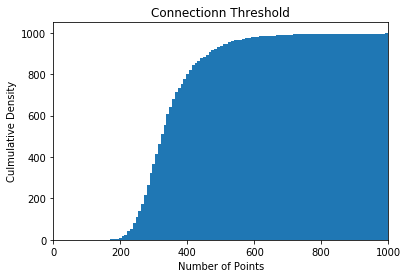

In [13]:
plt.hist(quick_data, cumulative=True, bins=100)
plt.gca().set(xlim=(0, 1000), xlabel='Number of Points', ylabel='Culmulative Density', title='Connectionn Threshold')
# plt.savefig('img/pval2r05.pdf')
plt.gca().set(xlim=(0, np.max(quick_data)))

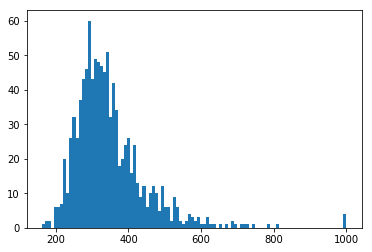

In [14]:
plt.hist(quick_data, bins=100);

In [16]:
n=1000
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

mt.smallest_r(points, pval=2)

([999,
  745,
  688,
  345,
  441,
  143,
  230,
  153,
  20,
  262,
  746,
  282,
  117,
  646,
  593,
  597,
  725,
  255,
  240,
  587,
  68,
  422,
  514,
  668,
  459,
  789,
  596,
  730,
  331,
  249,
  954,
  895,
  548,
  423,
  294,
  998],
 0.058601644486951245)

In [17]:
n=1000
trials = 100
all_results = {}
results = []
for i in range(trials):
    
    rand_points = np.random.uniform(size=(2, n-2))
    edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
    points = np.concatenate((rand_points, edge_points), axis=1)

    results.append(mt.smallest_r(points, pval=2)[1])
    

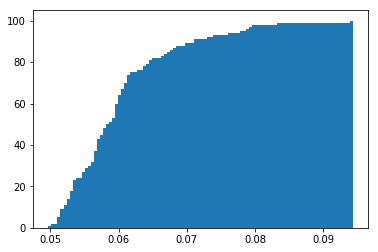

In [18]:
plt.hist(results, cumulative=True, bins=100);

In [19]:
mt.r1_area2D(2)*(.05**2)*n

1.9634950000000009

In [23]:
ns = [1000]
ps = [2]

mt.separate_perc_r(ns, ps, 'outputs/test_perc.txt', repeats=10)

True

In [22]:
import importlib
importlib.reload(mt)

<module 'minkowski_tools' from '/Users/matthewcotton/OneDrive - Imperial College London/UROP Summer 2020/DAGmetrics/minkowski_tools.py'>

In [9]:
data_dict = {}
for pval in [0.8, 1, 1.2]:
    data_dict[pval] = []
    n = 1000
    r = 0.1
    for i in range(1000):
        rand_points = np.random.uniform(size=(2, n-2))
        edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
        points = np.concatenate((rand_points, edge_points), axis=1)
        connections = mt.get_connections(points, pval=pval, radius=r)
        no_points = mt.perc_thresh_n(connections)
        data_dict[pval].append(no_points)

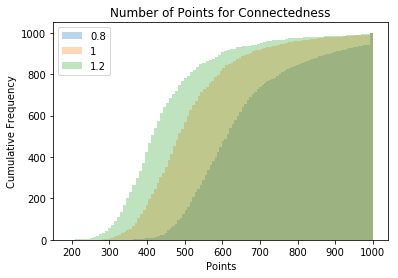

In [12]:
for pval in [0.8, 1, 1.2]:
    plt.hist(data_dict[pval], cumulative=True, bins=100, label=pval, alpha=.3);
    
plt.legend()
plt.gca().set(title='Number of Points for Connectedness', xlabel='Points', ylabel='Cumulative Frequency');
# plt.savefig('img/PointsCumul.pdf')

In [16]:
data_dict_r = {}
for pval in [0.8, 1, 1.2]:
    data_dict_r[pval] = []
    n = 1000
    r = 0.1
    for i in range(1000):
        print(i, end=',')
        rand_points = np.random.uniform(size=(2, n-2))
        edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
        points = np.concatenate((rand_points, edge_points), axis=1)
        r_min = smallest_r(points, pval)
        data_dict_r[pval].append(r_min[1])

0,

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in power
  if sys.path[0] == '':


1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,

[Text(0, 0.5, 'Cumulative Frequency'), Text(0.5, 0, 'r')]

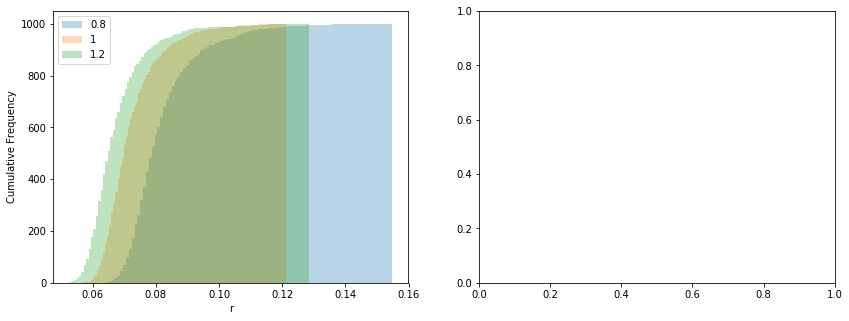

In [24]:
fig, [ax1, ax2] = plt.subplots(ncols=2, figsize=(14, 5))

for pval in [0.8, 1, 1.2]:
    ax1.hist(data_dict_r[pval], cumulative=True, bins=100, label=pval, alpha=.3);

ax1.legend()
ax1.set(xlabel='r', ylabel='Cumulative Frequency')
# plt.savefig('img/RadCumul.pdf')
# suptitle='Minimum r for Connectedness'

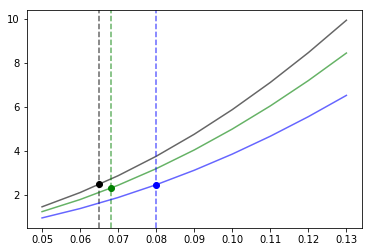

In [150]:
apprx_thresh = [0.065, 0.068, 0.08]
ps = [1.2, 1, 0.8]

for p, thresh, col in zip(ps, apprx_thresh, ['k', 'g', 'b']):
    rs = np.arange(0.05, 0.14, 0.01)
    ys = 1000*(mt.r1_area2D(p)*rs*rs)
    plt.scatter(thresh, 1000*(mt.r1_area2D(p)*thresh*thresh), c=col)
    plt.plot(rs, ys, c=col, alpha=0.6)
    plt.axvline(x=thresh, c=col, ls='--', label=p, alpha=0.6)

In [88]:
n=10
rand_points = np.random.uniform(size=(2, n-2))
edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
points = np.concatenate((rand_points, edge_points), axis=1)

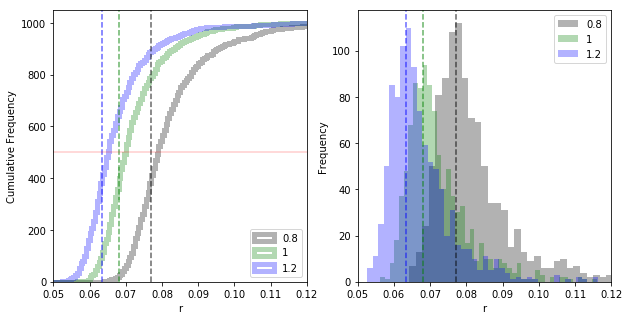

In [53]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
for pval, col in zip([0.8, 1, 1.2], ['k', 'g', 'b']):
    ax1.hist(data_dict_r[pval], bins=np.arange(0.05, 0.14, 0.0005), label=pval, alpha=.3, color=col, cumulative=1, histtype='step', lw=5)
    hist_out = ax2.hist(data_dict_r[pval], bins=50, color=col, alpha=0.3, label=pval)
    ys = hist_out[0]
    xs = (hist_out[1][1:]+hist_out[1][:-1])/2
    pt = thresh_calc(xs, ys, sig_fract=.8, n_av=5)[0]

    ax1.axvline(x=pt, ls='--', alpha=0.6, c=col)
    ax2.axvline(x=pt, ls='--', alpha=0.6, c=col)
    
ax1.axhline(y=500, alpha=0.2, c='r')
    
#     popt, pcov = curve_fit(skewed, xs, ys)
#     plt.plot(xs, skewed(xs, *popt))
ax1.set(xlim=(0.05, 0.12), xlabel='r', ylabel='Cumulative Frequency')
ax2.set(xlim=(0.05, 0.12), xlabel='r', ylabel='Frequency')
ax1.legend(loc='lower right')
ax2.legend()
plt.savefig('img/r_perc.pdf')
# plt.gca().set(title='Minimum r for Connectedness', xlabel='r', ylabel='Cumulative Frequency', xlim=(0.05, .1))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


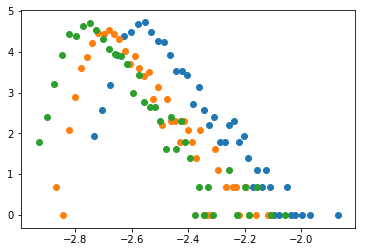

In [25]:
for pval in [0.8, 1, 1.2]:
    hist_out = np.histogram(data_dict_r[pval], bins=50);
    ys = hist_out[0]
    xs = (hist_out[1][1:]+hist_out[1][:-1])/2
#     popt, pcov = curve_fit(skewed, xs, ys)
    plt.scatter(np.log(xs), np.log(ys))

In [26]:
ys = hist_out[0]
xs = (hist_out[1][1:]+hist_out[1][:-1])/2
popt, pcov = curve_fit(skewed, xs, ys)
plt.plot(xs, skewed(xs, *popt))

NameError: name 'skewed' is not defined

In [54]:
def skewed(x, a, b, c, d):
#     (100*(xs-.06), 4, 50)
    return d*sp.stats.skewnorm.pdf(a*x-b, c)
    
popt, pcov = curve_fit(skewed, xs, ys)

hist_out = plt.hist(data_dict_r[pval], bins=50, label=pval, alpha=.3)
plt.plot(xs, skewed(xs, *popt))
# plt.plot(xs, skewed(xs, 100, 6, 4, 50))
# plt.plot(xs, ys, label='Fit')
plt.legend()
popt

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 1000.

In [43]:
def moving_average(a, n=3) :
    ret = np.cumsum(np.array(a))
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def thresh_calc(data, sig_fract=.8, n_av=5, bins=50):
    
    hist_data = np.histogram(data, bins=bins)
    
    xs, ys = (hist_data[1]+hist_data[1])/2, hist_data[0]
    smoothxs = (moving_average(xs, n=n_av))
    smoothys = (moving_average(ys, n=n_av))
    inds = np.where(smoothys > max(smoothys)*sig_fract)

    vals, err = np.polyfit(smoothxs[inds], smoothys[inds], 2, cov=True)
    
    stat_point = -.5*vals[1]/vals[0]
    fract_err = np.sqrt(err[0, 0]/(vals[0]**2) + err[1, 1]/(vals[1]**2))

    return stat_point, fract_err*stat_point

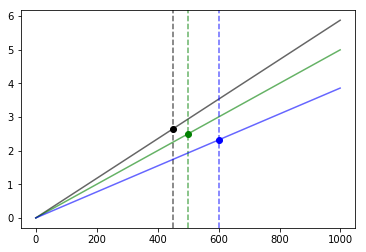

In [147]:
apprx_thresh = [450, 500, 600]
ps = [1.2, 1, 0.8]

for p, thresh, col in zip(ps, apprx_thresh, ['k', 'g', 'b']):
    xs = np.arange(1000)
    ys = xs*(mt.r1_area2D(p)*.1*.1)
    plt.scatter(thresh, thresh*(mt.r1_area2D(p)*.1*.1), c=col)
    plt.plot(xs, ys, c=col, alpha=0.6)
    plt.axvline(x=thresh, c=col, ls='--', label=p, alpha=0.6)

In [40]:
def separate_perc_n(p, r, n_max=None):

    if n_max==None:
        n_max=int(4/(mt.r1_area2D(p)*r*r))
        print(n_max)

    rand_points = np.random.uniform(size=(2, n_max-2))
    edge_points = np.array([[0.0, 1.0],[0.0, 1.0]])
    points = np.concatenate((rand_points, edge_points), axis=1)

    connections = mt.get_connections(points, radius=r, pval=p)

    return mt.perc_thresh_n(connections)

def ensemble_perc_n(fileName, ps, rs, repeats=1, verbose=True):

    for p, r in zip(ps, rs):
        
        if verbose:
            print(f'p:{p}, r:{r}')
            
        for i in range(repeats):
            if verbose:
                print(i, end=' ')
                
            thresh = separate_perc_n(p, r)
            file1 = open("{}".format(fileName),"a") 
            file1.writelines(f'{p} - {r} - {thresh}\n')
            file1.close()

        if verbose:
            print()
            
    return fileName

In [41]:
ensemble_perc_n('new_test.txt', [.8, 1.2, 2], [0.2, 0.1, 0.05], repeats=10)

p:0.8, r:0.2
0 258
1 258
2 258
3 258
4 258
5 258
6 258
7 258
8 258
9 258

p:1.2, r:0.1
0 680
1 680
2 680
3 680
4 680
5 680
6 680
7 680
8 680
9 680

p:2, r:0.05
0 2037
1 2037
2 2037
3 2037
4 2037
5 2037
6 2037
7 2037
8 2037
9 2037



'new_test.txt'

In [42]:
pd.read_csv('new_test.txt', header=None, delimiter=" - ")

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,0,1,2
0,0.8,0.20,104
1,0.8,0.20,155
2,0.8,0.20,216
3,0.8,0.20,158
4,0.8,0.20,134
5,0.8,0.20,110
6,0.8,0.20,156
7,0.8,0.20,255
8,0.8,0.20,194
9,0.8,0.20,104


In [68]:
p=.8
r=0.05

4/(mt.r1_area2D(p)*r*r)

4142.223234765676

In [3]:
pn1 = pd.read_csv('outputs/perc_n.txt', names=['p', 'r', 'n'], delimiter=" - ")
pn1.tail()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,p,r,n
44795,3.0,0.2,84
44796,3.0,0.2,84
44797,3.0,0.2,50
44798,3.0,0.2,47
44799,3.0,0.2,70


In [4]:
pn1['edges'] = pn1['n']*pn1['r']*pn1['r']*mt.kernel_area2D(pn1['p'])

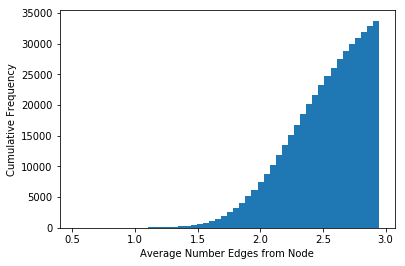

In [5]:
plt.hist(pn1[pn1['edges'] < 2.95]['edges'], bins=50, cumulative=1);
# plt.hist(pn1['edges'], bins=50, cumulative=1);
plt.gca().set(xlabel='Average Number Edges from Node', ylabel='Cumulative Frequency', );

[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Average Number Edges from Node')]

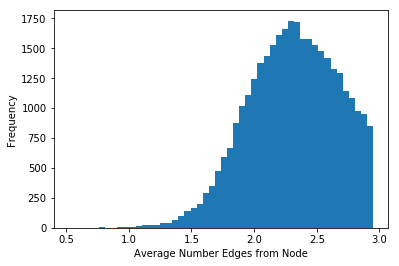

In [6]:
plt.hist(pn1[pn1['edges'] < 2.95]['edges'], bins=50, cumulative=0)
plt.gca().set(xlabel='Average Number Edges from Node', ylabel='Frequency', )

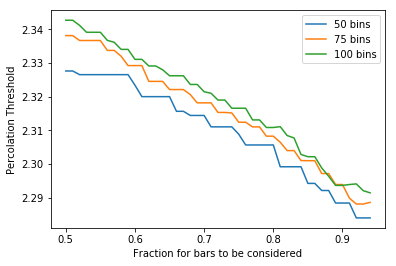

In [9]:
for bins in [50, 75, 100]:
    plt.plot(np.arange(0.5, 0.95, 0.01), [thresh_calc(pn1[pn1['edges'] < 2.95]['edges'], sig_fract=elem, bins=bins)[0] for elem in np.arange(0.5, 0.95, 0.01)], label=f'{bins} bins')
plt.legend()
plt.gca().set(xlabel='Fraction for bars to be considered', ylabel='Percolation Threshold', );

In [22]:
# #input file
# fin = open('outputs/perc_r5000clean.txt', "rt")
# #output file to write the result to
# fout = open("outputs/perc_r5000clean2.txt", "wt")
# #for each line in the input file
# for line in fin:
# 	#read replace the string and write to output file
# 	fout.write(line.replace('-[[', '- [['))
# #close input and output files
# fin.close()
# fout.close()

In [34]:
pr1 = pd.read_csv('outputs/perc_r5000clean2.txt', names=['p', 'n', 'r', 'path'], delimiter=" - ")
pr1['edges'] = pr1['n']*pr1['r']*pr1['r']*mt.kernel_area2D(pr1['p'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


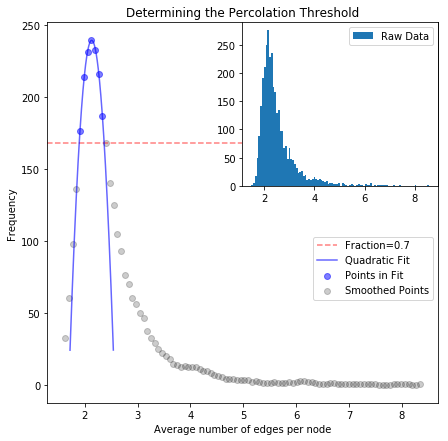

In [162]:
fig, ax = plt.subplots(figsize=(7, 7))
# axins = ax.inset_axes([5, 8, 150, 250])
axins = ax.inset_axes([0.5, 0.57, 0.5, 0.43])

hist_data = axins.hist(pr1['edges'], bins=100, label='Raw Data')

axins.legend(loc='upper right')


n_av = 5
sig_fract = .7
plot_fract = 0.1

xs, ys = (hist_data[1]+hist_data[1])/2, hist_data[0]
smoothxs = (moving_average(xs, n=n_av))
smoothys = (moving_average(ys, n=n_av))
inds = np.where(smoothys > max(smoothys)*sig_fract)
notinds = np.where(smoothys <= max(smoothys)*sig_fract)

[a, b, c], err = np.polyfit(smoothxs[inds], smoothys[inds], 2, cov=True)
# plt.plot(xs, vals[0]*xs*xs + vals[1]*xs + vals[2])
# plotx = xs[inds]

ax.scatter(smoothxs[inds], smoothys[inds], c='b', alpha=0.5, label='Points in Fit')
ax.scatter(smoothxs[notinds], smoothys[notinds], c='k', alpha=0.2, label='Smoothed Points')

plotx = smoothxs[inds]
lowerlim = max(smoothys)*plot_fract
quadx = np.arange((-b+np.sqrt(b*b - 4*a*(c-lowerlim)))/(2*a), (-b-np.sqrt(b*b - 4*a*(c-lowerlim)))/(2*a), 0.001)
quady = a*quadx*quadx + b*quadx + c
plotinds = np.where(quady > 0)

ax.axhline(max(smoothys)*sig_fract, color='r', alpha=0.5, ls='--', label=f'Fraction={sig_fract}')
ax.plot(quadx, quady, c='b', alpha=0.6, label='Quadratic Fit')

ax.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.45))
ax.set(xlabel='Average number of edges per node', ylabel='Frequency', title='Determining the Percolation Threshold');
plt.savefig('img/percthreshn5000.pdf')

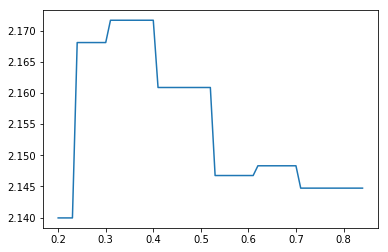

In [140]:
ss = np.arange(0.2, 0.85, 0.01)
plt.plot(ss, [thresh_calc(pr1['edges'], sig_fract=s)[0] for s in ss])